In [23]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

def ode(C,t):
    dC_dt = - k * C**2
    return dC_dt

k = 2
C0 = 2
t = np.linspace(0,8,400)

sol = odeint(ode, C0, t)

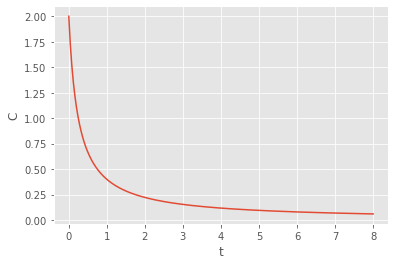

In [24]:
plt.plot(t, sol)
plt.xlabel('t');
plt.ylabel('C');

In [25]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    """Build a list of (weights, biases) tuples, one for each layer."""
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]


def swish(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))


def Ca(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = swish(outputs)    
    return outputs

    
# Here is our initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 8, 1])

# Derivatives
dCadt = elementwise_grad(Ca, 1)

k = 2
Ca0 = 2.0
t = np.linspace(0,8).reshape((-1, 1))

# This is the function we seek to minimize
def objective(params, step):
    # These should all be zero at the solution
    # dCadt = -k * Ca(t)
    zeq = dCadt(params, t) - (-k * Ca(params, t)**2)
    ic = Ca(params, 0) - Ca0
    return np.mean(zeq**2) + ic**2

def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step))
params = adam(grad(objective), params,
              step_size=0.001, num_iters=10001, callback=callback) 


tfit = np.linspace(0, 8).reshape(-1, 1)


Iteration   0 objective [[3.20388548]]
Iteration 1000 objective [[0.38424961]]
Iteration 2000 objective [[0.21620692]]
Iteration 3000 objective [[0.09329333]]
Iteration 4000 objective [[0.03886008]]
Iteration 5000 objective [[0.01542816]]
Iteration 6000 objective [[0.00551295]]
Iteration 7000 objective [[0.00240121]]
Iteration 8000 objective [[0.001131]]
Iteration 9000 objective [[0.00056485]]
Iteration 10000 objective [[0.0003192]]


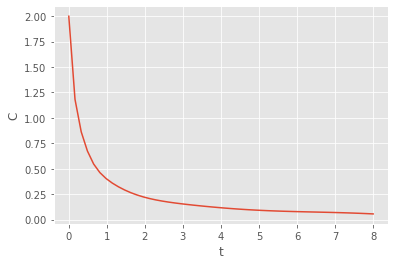

In [30]:
plt.plot(tfit, Ca(params, tfit))
plt.xlabel('t');
plt.ylabel('C');